In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
%matplotlib inline

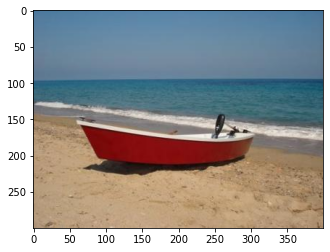

In [2]:
I = cv2.imread('bote.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I, cmap='gray')

In [3]:
medias_historial=[]
Ir=I.astype(float)
size_image=I.shape
Ir=np.reshape(I,(size_image[0]*size_image[1],3))
num_classes=4
num_iteraciones=30
medias=np.zeros((3,num_classes))
distancia=np.zeros((size_image[0]*size_image[1],num_classes))
for i in range(num_classes):
    medias[:,i]=Ir[random.randint(0, size_image[0]*size_image[1]-1),:]
    # medias[:,i]=[random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
medias_historial.append(medias)
    # print(np.transpose(medias))
for epoca in range(num_iteraciones):
    for i in range(num_classes):
        distancia[:,i]=np.sqrt(np.sum((Ir-medias[:,i])**2, axis = 1)) 
    assi=np.argmin(distancia,axis=1) 
    
    for i in range(num_classes):
        medias[:,i]=np.mean(Ir[np.argwhere(assi == i),:],axis=0) 
    medias_historial.append(medias)        
    # print(np.transpose(medias))

print(np.transpose(medias))    
assi=np.reshape(assi,(size_image[0],size_image[1]))

[[180.99143565 151.8499941  118.35960835]
 [ 89.8958466  122.98856542 143.97829341]
 [211.11763403 202.8201152  194.49468321]
 [103.83887865  22.94150742  19.83781162]]


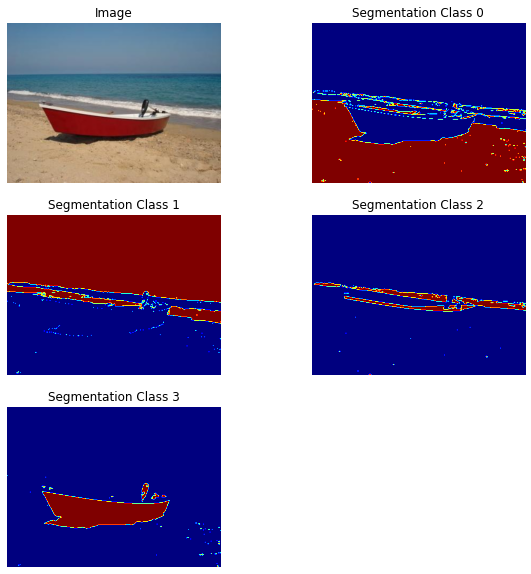

In [4]:
nf=np.ceil((num_classes+1)/2).astype(int)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(nf, 2, 1)
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.title('Image')
for i in range(num_classes):
    ax = fig.add_subplot(nf, 2, i+2)
    plt.imshow(assi==i, cmap='jet')
    plt.axis('off')
    plt.title('Segmentation '+'Class '+str(i))

(3, 4)
0
1
2
3


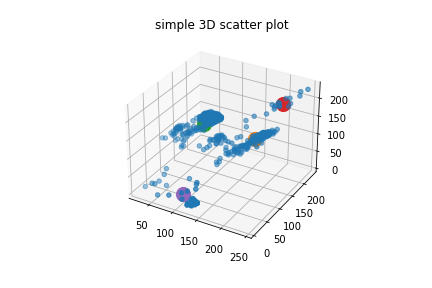

In [5]:
%matplotlib widget

n_data=500
randomlist = random.sample(range(0, size_image[0]*size_image[1]), n_data)
muestra=Ir[randomlist,:]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(muestra[:,0], muestra[:,1],muestra[:,2])
plt.title("simple 3D scatter plot")
print(medias.shape)

for i in range(num_classes):
    print(i)
    ax.scatter3D(medias[0,i],medias[1,i],medias[2,i], s=200, alpha=1)  
    
# show plot
plt.show()